In [4]:
from google.colab import drive #Mounting the drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:

!pip install ts2vg
!pip install igraph
# !pip install pycairo
# !pip install cairocffi




Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 42.5 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 58.8 MB/s eta 0:00:00


Task 1 

---



In [5]:

import pandas as pd
from ts2vg import NaturalVG
from ts2vg import HorizontalVG
import numpy as np
#Defining graph methods NVG,HVG;paths,activities,axes
Method_list=["NVG","HVG"] 
path="/content/drive/MyDrive/DataChestHead_v1/" # Defining the path from the mounted drive
Activity_List=["running","walking","climbingup","climbingdown"] 
Sensor_position=["head","chest"] #Found head & chest sensor placement which gives best values for activities
Dimension_list=['attr_x', 'attr_y', 'attr_z'] # List of sensor readings
# Created a list to append the output
data_frame_list_head=[]  # list to store the entries of the head body position
data_frame_list_chest=[] # list to store the entries of the chest body position
list_of_subject=np.arange(1,16) # Arranged subjects 1 to 15
for position in Sensor_position: # For loop to get sensor position
    for subject_number in list_of_subject: # For loop to get subject number
        for activity in Activity_List: # For loop to get Activitylist
            df_Timeseriesdata=pd.read_csv(path+"acc_"+activity+"_"+position+"_S"+str(subject_number)+".csv") #Read data from the path
            for dimension in Dimension_list: # For loop to get the axes dimensions
                for method in Method_list:  # For loop to get type of method
                  if method=="NVG":  # for the NVG plot 
                    g = NaturalVG() 
                    g.build(df_Timeseriesdata[dimension][1000:2024]) #Selecting 1024 sample data points
                    ig_g = g.as_igraph()  # Converting NetworkX graph object (stored in the variable g) to an igraph graph object (stored in the variable ig_g).
                    # Storing the required columns in dictionary
                    datadict={"Method":method, # Methods among ["NVG","HVG"]
                              "Subject":subject_number, # subject number
                              "Acceleometer_Axis":dimension # dimensions form x , y ,z
                              ,"Average degree":np.mean(ig_g.degree()),# Calculating avg degree,Network diameter,Average path length
                              "Network diameter":ig_g.diameter(), # To compute network diameter
                              "Average path length":ig_g.average_path_length(), # To compute Average path length
                              "Activity":activity # Walking or running
                              } 
                    
                  else: 
                    g = HorizontalVG()
                    g.build(df_Timeseriesdata[dimension][1000:2024]) #Selecting 1024 sample data points
                    ig_g = g.as_igraph()
                    datadict={"Method":method,# Methods among ["NVG","HVG"]
                              "Subject":subject_number,# subject number
                              "Acceleometer_Axis":dimension # dimensions form x , y ,z
                              ,"Average degree":np.mean(ig_g.degree()),# Calculating avg degree,Network diameter,Average path length
                              "Network diameter":ig_g.diameter(),# To compute network diameter
                              "Average path length":ig_g.average_path_length(), # To compute Average path length
                              "Activity":activity}# Walking or running
                  if(position=="head"):  
                    data_frame_list_head.append(datadict) # adding to the head data set
                  else:
                    data_frame_list_chest.append(datadict)# adding to the chest data set
                 
df_head=pd.DataFrame(data_frame_list_head)#Converting list of Dictionaries to Dataframe for head
df_chest=pd.DataFrame(data_frame_list_chest) #Converting list of Dictionaries to Dataframe for chest





In [6]:
# isolating only entries from the activity running , walking ,
# climbing up and climbing dowm for both head and the chest body positions
walking_running_head = df_head[df_head['Activity'].isin(['walking', 'running'])] 
walking_running_chest=df_chest[df_chest['Activity'].isin(['walking', 'running'])]
climbing_head = df_head[df_head['Activity'].isin(['climbingup', 'climbingdown'])]
climbing_chest=df_chest[df_chest['Activity'].isin(['climbingup', 'climbingdown'])]

In [7]:
from tabulate import tabulate

In [8]:
print(tabulate(df_head, headers = df_head.columns, tablefmt = 'psql', showindex=False)) #Tabulating the output for head body position

+----------+-----------+---------------------+------------------+--------------------+-----------------------+--------------+
| Method   |   Subject | Acceleometer_Axis   |   Average degree |   Network diameter |   Average path length | Activity     |
|----------+-----------+---------------------+------------------+--------------------+-----------------------+--------------|
| NVG      |         1 | attr_x              |          9.60156 |                  9 |               4.61749 | running      |
| HVG      |         1 | attr_x              |          3.95312 |                 31 |              10.8564  | running      |
| NVG      |         1 | attr_y              |          9.01367 |                  9 |               4.96926 | running      |
| HVG      |         1 | attr_y              |          3.96484 |                 21 |               7.21191 | running      |
| NVG      |         1 | attr_z              |          8.14648 |                 10 |               4.96004 | running

In [9]:
print(tabulate(df_chest, headers = df_chest.columns, tablefmt = 'psql', showindex=False)) #Tabulating the output for chest body position

+----------+-----------+---------------------+------------------+--------------------+-----------------------+--------------+
| Method   |   Subject | Acceleometer_Axis   |   Average degree |   Network diameter |   Average path length | Activity     |
|----------+-----------+---------------------+------------------+--------------------+-----------------------+--------------|
| NVG      |         1 | attr_x              |          8.41406 |                  9 |               4.30764 | running      |
| HVG      |         1 | attr_x              |          3.96289 |                 22 |               7.54384 | running      |
| NVG      |         1 | attr_y              |         11.1367  |                 82 |              28.6519  | running      |
| HVG      |         1 | attr_y              |          3.83594 |                 90 |              31.6349  | running      |
| NVG      |         1 | attr_z              |          8.31836 |                 11 |               4.64437 | running

For Walking_Running_Head 

In [10]:

from plotly.subplots import make_subplots # importing the make_subplots from plotly
import plotly.graph_objects as go # importing the graph_objects from plotly
# Plotting Avg Degree VS Network Diameter for Walking/Running activities
list_of_dimensions=["attr_x","attr_y","attr_z"] # list of sensor readings
methods=["HVG","NVG"] # list of methods

fig = make_subplots(rows=3, cols=2,subplot_titles=["For X Dimension","For X Dimension",   # setting the subplot titles 
                                                   "For Y Dimension","For Y Dimension",
                                                   "For Z Dimension","For Z Dimension"]
                    )
row_count=1 # row of the chart 
col_count=1 # column of the chart
chart_count=1 # chart count for the axis 
for x in list_of_dimensions:# iterating the sensor reading dimension

    for y in methods: # iterating the methods from NVG and HVG
        relevant_data=walking_running_head[(walking_running_head["Acceleometer_Axis"]==x) & (walking_running_head["Method"]==y)] # extracting the data for respective reading and method
        if row_count==1 and col_count==1: # for the first chart 
                   fig.append_trace(go.Scatter(x=relevant_data.query("Activity == 'walking'")['Average degree'],  # querying the data for activity
                                    y=relevant_data.query("Activity == 'walking'")['Network diameter'],connectgaps=False,
                            mode='markers',
                            marker={
                                  "color":"blue" # setting the color according to the class
                                  },name="walking"),row=row_count,col=col_count) # setting the name as per the activity
                   fig.append_trace(go.Scatter(x=relevant_data.query("Activity == 'running'")['Average degree'],# querying the data for activity
                                    y=relevant_data.query("Activity == 'running'")['Network diameter'],connectgaps=False,
                            mode='markers',
                            marker={
                                  "color":"red" # setting the color according to the class
                                  },name="running"),row=row_count,col=col_count)# setting the name as per the activity
        else:
                   fig.append_trace(go.Scatter(x=relevant_data.query("Activity == 'walking'")['Average degree'],# querying the data for activity
                                    y=relevant_data.query("Activity == 'walking'")['Network diameter'],connectgaps=False,
                            mode='markers',
                            marker={
                                  "color":"blue" # setting the color according to the class
                                  },name="walking",showlegend=False),row=row_count,col=col_count) # setting the name as per the activity

                   fig.append_trace(go.Scatter(x=relevant_data.query("Activity == 'running'")['Average degree'],# querying the data for activity
                                    y=relevant_data.query("Activity == 'running'")['Network diameter'],connectgaps=False,
                            mode='markers',
                            marker={
                                  "color":"red" # setting the color according to the class
                                  },name="running",showlegend=False),row=row_count,col=col_count) # setting the name as per the activity
        
        col_count=col_count+1 # updating the column for next method

        
    col_count=1 # once all methods for a reading are finished come back to first column
    row_count=row_count+1 # once an entire column is finished jump to next row
for x in list_of_dimensions:# iterating the sensor reading dimension
  for y in Method_list: # iterating the methods from NVG and HVG
      fig['layout']['xaxis'+str(chart_count)]['title']= 'Average degree for '+str(y) # setting the x-axis titles of charts as per method for each subplot
      fig['layout']['yaxis'+str(chart_count)]['title']='Network Diameter '+str(y)# setting the y-axis titles of charts as per method for each subplot
      chart_count=chart_count+1 # move to next chart after updating the chart axes
fig.update_layout(title=dict(text="Walking_Running_Head"),height=1200,width=1000) # setting the figure height and width and figure Title

fig.show() # display the figure






For Walking_Running_Chest

In [11]:

from plotly.subplots import make_subplots # importing the make_subplots from plotly
import plotly.graph_objects as go # importing the graph_objects from plotly
# Plotting Avg Degree VS Network Diameter for Walking/Running activities
list_of_dimensions=["attr_x","attr_y","attr_z"] # list of sensor readings
methods=["HVG","NVG"] # list of methods

fig = make_subplots(rows=3, cols=2,subplot_titles=["For X Dimension","For X Dimension",# setting the subplot titles 
                                                   "For Y Dimension","For Y Dimension",
                                                   "For Z Dimension","For Z Dimension"]
                    )
row_count=1 # row of the chart 
col_count=1 # column of the chart
chart_count=1 # chart count for the axis 
for x in list_of_dimensions: #iterating the sensor reading dimension

    for y in methods: # iterating the methods from NVG and HVG
        relevant_data=walking_running_chest[(walking_running_head["Acceleometer_Axis"]==x) & (walking_running_chest["Method"]==y)] # extracting the data for respective reading and method
        if row_count==1 and col_count==1: # for the first chart 
                   fig.append_trace(go.Scatter(x=relevant_data.query("Activity == 'walking'")['Average degree'],# querying the data for activity
                                    y=relevant_data.query("Activity == 'walking'")['Network diameter'],connectgaps=False,
                            mode='markers',
                            marker={
                                  "color":"blue" # setting the color according to the class
                                  },name="walking"),row=row_count,col=col_count)# setting the name as per the activity
                   fig.append_trace(go.Scatter(x=relevant_data.query("Activity == 'running'")['Average degree'],# querying the data for activity
                                    y=relevant_data.query("Activity == 'running'")['Network diameter'],connectgaps=False,
                            mode='markers',
                            marker={
                                  "color":"red" # setting the color according to the class
                                  },name="running"),row=row_count,col=col_count)# setting the name as per the activity
        else:
                   fig.append_trace(go.Scatter(x=relevant_data.query("Activity == 'walking'")['Average degree'],# querying the data for activity
                                    y=relevant_data.query("Activity == 'walking'")['Network diameter'],connectgaps=False,
                            mode='markers',
                            marker={
                                  "color":"blue" # setting the color according to the class
                                  },name="walking",showlegend=False),row=row_count,col=col_count)# setting the name as per the activity
                   fig.append_trace(go.Scatter(x=relevant_data.query("Activity == 'running'")['Average degree'],# querying the data for activity
                                    y=relevant_data.query("Activity == 'running'")['Network diameter'],connectgaps=False,
                            mode='markers',
                            marker={
                                  "color":"red" # setting the color according to the class
                                  },name="running",showlegend=False),row=row_count,col=col_count)# setting the name as per the activity
        
        col_count=col_count+1 # updating the column for next method

        
    col_count=1 # once all methods for a reading are finished come back to first column
    row_count=row_count+1 # once an entire column is finished jump to next row
for x in list_of_dimensions:# iterating the sensor reading dimension
  for y in Method_list: # iterating the methods from NVG and HVG
      fig['layout']['xaxis'+str(chart_count)]['title']= 'Average degree for '+str(y) # setting the x-axis titles of charts as per method for each subplot
      fig['layout']['yaxis'+str(chart_count)]['title']='Network Diameter '+str(y) # setting the y-axis titles of charts as per method for each subplot
      chart_count=chart_count+1 # move to next chart after updating the chart axes
fig.update_layout(title=dict(text="Walking_Running_Chest"),height=1200,width=1000)# setting the figure height and width and figure Title

fig.show() # display the figure


 For Climbing_up_down_Head

In [12]:
from plotly.subplots import make_subplots # importing the make_subplots from plotly
import plotly.graph_objects as go # importing the graph_objects from plotly
# Plotting Avg Degree VS Network Diameter for ClimbingUp/Climbingdowm activities
list_of_dimensions=["attr_x","attr_y","attr_z"]# list of sensor readings
methods=["HVG","NVG"] # list of methods

fig = make_subplots(rows=3, cols=2,subplot_titles=["For X Dimension","For X Dimension", # setting the subplot titles 
                                                   "For Y Dimension","For Y Dimension",
                                                   "For Z Dimension","For Z Dimension"]
                    )
row_count=1  # row of the chart
col_count=1 # column of the chart
chart_count=1 # chart count for the axis
for x in list_of_dimensions: #iterating the sensor reading dimension

    for y in methods: # iterating the methods from NVG and HVG
        relevant_data=climbing_head[(climbing_head["Acceleometer_Axis"]==x) & (climbing_head["Method"]==y)] # extracting the data for respective reading and method
        if row_count==1 and col_count==1: # for the first chart 
                   fig.append_trace(go.Scatter(x=relevant_data.query("Activity == 'climbingdown'")['Average degree'], # querying the data for activity
                                    y=relevant_data.query("Activity == 'climbingdown'")['Network diameter'],connectgaps=False,
                            mode='markers',
                            marker={
                                  "color":"blue" # setting the color according to the class
                                  },name="climbingdown"),row=row_count,col=col_count) # setting the name as per the activity
                   fig.append_trace(go.Scatter(x=relevant_data.query("Activity == 'climbingup'")['Average degree'], # querying the data for activity
                                    y=relevant_data.query("Activity == 'climbingup'")['Network diameter'],connectgaps=False,
                            mode='markers',
                            marker={
                                  "color":"red" # setting the color according to the class
                                  },name="climbingup"),row=row_count,col=col_count)# setting the name as per the activity
        else:
                   fig.append_trace(go.Scatter(x=relevant_data.query("Activity == 'climbingdown'")['Average degree'], # querying the data for activity
                                    y=relevant_data.query("Activity == 'climbingdown'")['Network diameter'],connectgaps=False,
                            mode='markers',
                            marker={
                                  "color":"blue" # setting the color according to the class
                                  },name="climbingdown",showlegend=False),row=row_count,col=col_count) # setting the name as per the activity
                   fig.append_trace(go.Scatter(x=relevant_data.query("Activity == 'climbingup'")['Average degree'], # querying the data for activity
                                    y=relevant_data.query("Activity == 'climbingup'")['Network diameter'],connectgaps=False,
                            mode='markers',
                            marker={
                                  "color":"red" # setting the color according to the class
                                  },name="climbingup",showlegend=False),row=row_count,col=col_count) # setting the name as per the activity
        
        col_count=col_count+1 # updating the column for next method

        
    col_count=1 # once all methods for a reading are finished come back to first column
    row_count=row_count+1 # once an entire column is finished jump to next row
for x in list_of_dimensions: # iterating the sensor reading dimension
  for y in Method_list: # iterating the methods from NVG and HVG
      fig['layout']['xaxis'+str(chart_count)]['title']= 'Average degree for '+str(y)  # setting the x-axis titles of charts as per method for each subplot
      fig['layout']['yaxis'+str(chart_count)]['title']='Network Diameter '+str(y) # setting the y-axis titles of charts as per method for each subplot
      chart_count=chart_count+1 # move to next chart after updating the chart axes
fig.update_layout(title=dict(text="Climbing_up_down_Head"),height=1200,width=1000) # setting the figure height and width and figure Title

fig.show() # display the figure

For Climbing_up_down_Chest


In [13]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go
# Plotting Avg Degree VS Network Diameter for ClimbingUp/Climbingdowm activities
list_of_dimensions=["attr_x","attr_y","attr_z"]# list of sensor readings
methods=["HVG","NVG"] # list of methods

fig = make_subplots(rows=3, cols=2,subplot_titles=["For X Dimension","For X Dimension", # setting the subplot titles 
                                                   "For Y Dimension","For Y Dimension",
                                                   "For Z Dimension","For Z Dimension"]
                    )
row_count=1 # row of the chart
col_count=1 # column of the chart
chart_count=1 # chart count for the axis
for x in list_of_dimensions: #iterating the sensor reading dimension

    for y in methods: # iterating the methods from NVG and HVG
        relevant_data=climbing_chest[(climbing_chest["Acceleometer_Axis"]==x) & (climbing_chest["Method"]==y)] # extracting the data for respective reading and method
        if row_count==1 and col_count==1: # for the first chart 
                   fig.append_trace(go.Scatter(x=relevant_data.query("Activity == 'climbingdown'")['Average degree'], # querying the data for activity
                                    y=relevant_data.query("Activity == 'climbingdown'")['Network diameter'],connectgaps=False,
                            mode='markers',
                            marker={
                                  "color":"blue" # setting the color according to the class
                                  },name="climbingdown"),row=row_count,col=col_count) 
                   fig.append_trace(go.Scatter(x=relevant_data.query("Activity == 'climbingup'")['Average degree'], # querying the data for activity
                                    y=relevant_data.query("Activity == 'climbingup'")['Network diameter'],connectgaps=False,
                            mode='markers',
                            marker={
                                  "color":"red" # setting the color according to the class
                                  },name="climbingup"),row=row_count,col=col_count) # setting the name as per the activity
        else:
                   fig.append_trace(go.Scatter(x=relevant_data.query("Activity == 'climbingdown'")['Average degree'], # querying the data for activity
                                    y=relevant_data.query("Activity == 'climbingdown'")['Network diameter'],connectgaps=False,
                            mode='markers',
                            marker={
                                  "color":"blue" # setting the color according to the class
                                  },name="climbingdown",showlegend=False),row=row_count,col=col_count) # setting the name as per the activity
                   fig.append_trace(go.Scatter(x=relevant_data.query("Activity == 'climbingup'")['Average degree'], # querying the data for activity
                                    y=relevant_data.query("Activity == 'climbingup'")['Network diameter'],connectgaps=False,
                            mode='markers',
                            marker={
                                  "color":"red" # setting the color according to the class
                                  },name="climbingup",showlegend=False),row=row_count,col=col_count) # setting the name as per the activity
        
        col_count=col_count+1 # updating the column for next method

        
    col_count=1 # once all methods for a reading are finished come back to first column
    row_count=row_count+1 # once an entire column is finished jump to next row
for x in list_of_dimensions: # iterating the sensor reading dimension
  for y in Method_list: # iterating the methods from NVG and HVG
      fig['layout']['xaxis'+str(chart_count)]['title']= 'Average degree for '+str(y) # setting the x-axis titles of charts as per method for each subplot
      fig['layout']['yaxis'+str(chart_count)]['title']='Network Diameter '+str(y) # setting the y-axis titles of charts as per method for each subplot
      chart_count=chart_count+1 # move to next chart after updating the chart axes
fig.update_layout(title=dict(text="Climbing_up_down_Chest"),height=1200,width=1000) # setting the figure height and width and figure Title

fig.show() # display the figure

Task 2 

The Code for Permutation Entropy and Complexity in the following cell is picked up from this link https://github.com/srk-srinivasan/Permutation-Entropy


This is the expression of permutation Entropy used for logic


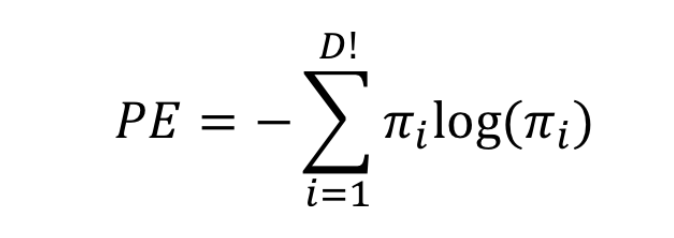

This is the expression of Complexity used for logic

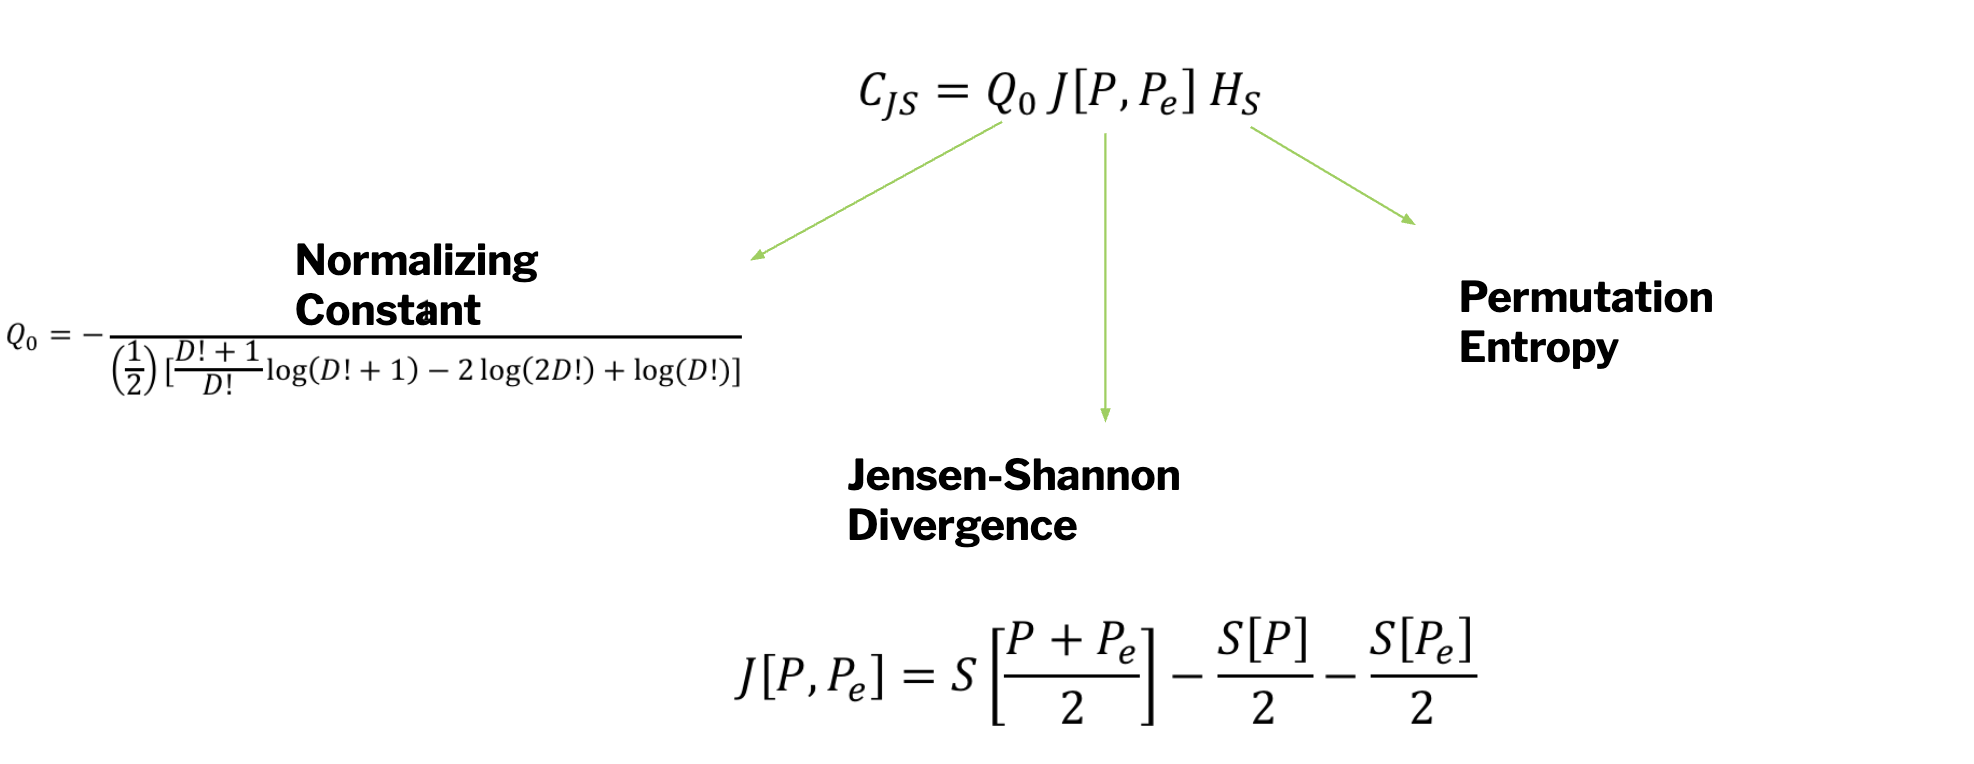

In [14]:

import numpy as np

def s_entropy(freq_list):
    freq_list = [element for element in freq_list if element != 0]
    sh_entropy = 0.0
    for freq in freq_list:
        sh_entropy += freq * np.log(freq)
    sh_entropy = -sh_entropy
    return(sh_entropy)

def ordinal_patterns(ts, embdim, embdelay):
    m, t = embdim, embdelay
    x = ts if isinstance(ts, np.ndarray) else np.array(ts) 

    tmp = np.zeros((x.shape[0], m))
    for i in range(m):
        tmp[:, i] = np.roll(x, i*t)
    partition = tmp[(t*(m-1)):, :] 
    permutation = np.argsort(partition)
    idx = _hash(permutation)

    counts = np.zeros(np.math.factorial(m))
    for i in range(counts.shape[0]):
        counts[i] = (idx == i).sum()
    return list(counts[counts != 0].astype(int))

def _hash(x):
    m, n = x.shape
    if n == 1:
        return np.zeros(m)
    return np.sum(np.apply_along_axis(lambda y: y < x[:, 0], 0, x), axis=1) * np.math.factorial(n-1) + _hash(x[:, 1:]) 
    

def p_entropy(op):
    ordinal_pat = op
    max_entropy = np.log(len(ordinal_pat))
    p = np.divide(np.array(ordinal_pat), float(sum(ordinal_pat)))
    return(s_entropy(p)/max_entropy)

def complexity(op):

    pe = p_entropy(op)
    constant1 = (0.5+((1 - 0.5)/len(op)))* np.log(0.5+((1 - 0.5)/len(op)))
    constant2 = ((1 - 0.5)/len(op))*np.log((1 - 0.5)/len(op))*(len(op) - 1)
    constant3 = 0.5*np.log(len(op))
    Q_o = -1/(constant1+constant2+constant3)

    temp_op_prob = np.divide(op, sum(op))
    temp_op_prob2 = (0.5*temp_op_prob)+(0.5*(1/len(op)))
    JSdivergence = (s_entropy(temp_op_prob2) - 0.5 * s_entropy(temp_op_prob) - 0.5 * np.log(len(op)))
    Comp_JS = Q_o * JSdivergence * pe
    return(Comp_JS)

def weighted_ordinal_patterns(ts, embdim, embdelay):
    m, t = embdim, embdelay
    x = ts if isinstance(ts, np.ndarray) else np.array(ts) 

    tmp = np.zeros((x.shape[0], m))
    for i in range(m):
        tmp[:, i] = np.roll(x, i*t)
    partition = tmp[(t*(m-1)):, :] 
    xm = np.mean(partition, axis=1)
    weight = np.mean((partition - xm[:, None])**2, axis=1)
    permutation = np.argsort(partition)
    idx = _hash(permutation)
    counts = np.zeros(np.math.factorial(m))
    for i in range(counts.shape[0]):
        counts[i] = sum(weight[i == idx])

    return list(counts[counts != 0]) 



Extract the files 

In [15]:
import pandas as pd
from ts2vg import NaturalVG
from ts2vg import HorizontalVG
import numpy as np
#Defining graph methods NVG,HVG;paths,activities,axes
path="/content/drive/MyDrive/DataChestHead_v1/" # Defining the path from the mounted drive
Activity_List=["running","walking","climbingup","climbingdown"] 
Sensor_position=["head","chest"] #Found head &chest sensor placement gives best values for activities
Dimension_list=[3,4,5,6]
Acceleometer_Axis=["attr_x","attr_y","attr_z"]
Delay_list=[1,2,3]
Signal_length=[1024,2048,4096]
# Created a list to append the output
data_frame_list_head=[] 
data_frame_list_chest=[]
list_of_subject=np.arange(1,16) # Arranged subjects 1 to 15
for position in Sensor_position: # For loop to get sensor position
    for subject_number in list_of_subject: # For loop to get subject number
        for activity in Activity_List: # For loop to get Activitylist
            df_Timeseriesdata=pd.read_csv(path+"acc_"+activity+"_"+position+"_S"+str(subject_number)+".csv") #Read data from the path
            for reading in Acceleometer_Axis: # For loop to get the axes dimensions
                for signal in Signal_length: # iterate over the Signals
                  ts=np.array(df_Timeseriesdata[reading].iloc[1000:1000+signal]) # time series signal data points
                  for dimension in Dimension_list: # iterarting over the D value
                    for delay in Delay_list: # iterarting over the Tau value
                      patterns=ordinal_patterns(ts,dimension,delay) # generating the patterns for the different phases
                      Entropy=p_entropy(patterns) # Calculating the permutation entropy
                      Complexity=complexity(patterns) # Calculating the Complexity 
                      datadict={"Subject":subject_number,"Acceleometer_Axis":reading,"Signal_length":signal,"Dimension":dimension,"Delay":delay,"Permutaion_Entropy":Entropy,
                                "Complexity":Complexity,"Activity":activity} # Creating the row dictionary
                      if(position=="head"): # checking the body position
                          data_frame_list_head.append(datadict) # adding to the head data set
                      else:
                          data_frame_list_chest.append(datadict) # adding to the chest data set
                    
                    
                  
                 
df_head_entropy=pd.DataFrame(data_frame_list_head) #Converting list of Dictionaries to Dataframe for head for entropy
df_chest_entropy=pd.DataFrame(data_frame_list_chest) #Converting list of Dictionaries to Dataframe for chest for entropy

 # isolating the activity from running, walking, climbingup, climbingdown
df_head_entropy_running_walking=df_head_entropy[df_head_entropy["Activity"].isin(["running","walking"])]
df_head_entropy_up_down=df_head_entropy[df_head_entropy["Activity"].isin(["climbingup","climbingdown"])]
df_chest_entropy_running_walking=df_chest_entropy[df_chest_entropy["Activity"].isin(["running","walking"])]
df_chest_entropy_up_down=df_chest_entropy[df_chest_entropy["Activity"].isin(["climbingup","climbingdown"])]

In [16]:
from tabulate import tabulate # importing tabulate

In [24]:
df_head_entropy

,Subject,Acceleometer_Axis,Signal_length,Dimension,Delay,Permutaion_Entropy,Complexity,Activity
0,1,attr_x,1024,3,1,0.744359,0.168927,running
1,1,attr_x,1024,3,2,0.810439,0.138466,running
2,1,attr_x,1024,3,3,0.804421,0.144569,running
3,1,attr_x,1024,4,1,0.682901,0.218205,running
4,1,attr_x,1024,4,2,0.759731,0.193285,running
...,...,...,...,...,...,...,...,...
6475,15,attr_z,4096,5,2,0.906017,0.134746,climbingdown
6476,15,attr_z,4096,5,3,0.918146,0.125035,climbingdown
6477,15,attr_z,4096,6,1,0.859818,0.211468,climbingdown
6478,15,attr_z,4096,6,2,0.898159,0.181036,climbingdown


In [17]:
print(tabulate(df_head_entropy, headers = df_head_entropy.columns, tablefmt = 'psql', showindex=False)) #Tabulating the output for head for entropy body position

+-----------+---------------------+-----------------+-------------+---------+----------------------+--------------+--------------+
|   Subject | Acceleometer_Axis   |   Signal_length |   Dimension |   Delay |   Permutaion_Entropy |   Complexity | Activity     |
|-----------+---------------------+-----------------+-------------+---------+----------------------+--------------+--------------|
|         1 | attr_x              |            1024 |           3 |       1 |             0.744359 |  0.168927    | running      |
|         1 | attr_x              |            1024 |           3 |       2 |             0.810439 |  0.138466    | running      |
|         1 | attr_x              |            1024 |           3 |       3 |             0.804421 |  0.144569    | running      |
|         1 | attr_x              |            1024 |           4 |       1 |             0.682901 |  0.218205    | running      |
|         1 | attr_x              |            1024 |           4 |       2 |      

In [25]:
df_chest_entropy

,Subject,Acceleometer_Axis,Signal_length,Dimension,Delay,Permutaion_Entropy,Complexity,Activity
0,1,attr_x,1024,3,1,0.900066,0.086750,running
1,1,attr_x,1024,3,2,0.977526,0.022479,running
2,1,attr_x,1024,3,3,0.993458,0.006422,running
3,1,attr_x,1024,4,1,0.850678,0.165682,running
4,1,attr_x,1024,4,2,0.967434,0.042838,running
...,...,...,...,...,...,...,...,...
6475,15,attr_z,4096,5,2,0.930673,0.113589,climbingdown
6476,15,attr_z,4096,5,3,0.967689,0.058713,climbingdown
6477,15,attr_z,4096,6,1,0.838598,0.246194,climbingdown
6478,15,attr_z,4096,6,2,0.930232,0.145781,climbingdown


In [18]:
print(tabulate(df_chest_entropy, headers = df_chest_entropy.columns, tablefmt = 'psql', showindex=False)) #Tabulating the output for head body position

+-----------+---------------------+-----------------+-------------+---------+----------------------+--------------+--------------+
|   Subject | Acceleometer_Axis   |   Signal_length |   Dimension |   Delay |   Permutaion_Entropy |   Complexity | Activity     |
|-----------+---------------------+-----------------+-------------+---------+----------------------+--------------+--------------|
|         1 | attr_x              |            1024 |           3 |       1 |             0.900066 |  0.0867498   | running      |
|         1 | attr_x              |            1024 |           3 |       2 |             0.977526 |  0.0224787   | running      |
|         1 | attr_x              |            1024 |           3 |       3 |             0.993458 |  0.00642218  | running      |
|         1 | attr_x              |            1024 |           4 |       1 |             0.850678 |  0.165682    | running      |
|         1 | attr_x              |            1024 |           4 |       2 |      

Climbingup_ClimbingDown_Chest


In [26]:

data=df_chest_entropy_up_down[(df_chest_entropy_up_down["Signal_length"]==4096) & (df_chest_entropy_up_down["Delay"]==1)] # extracting the data for signal 4096 and Delay 1
from plotly.subplots import make_subplots # import sub_plots from plotly
import plotly.graph_objects as go # import graph objects from plotly
# Plotting Complexity VS Entropy for Climbingup/Climbingdown activities
list_of_axis=["attr_x","attr_y","attr_z"] # stores the sensor readings axis
list_of_dimensions=[3,4,5,6]  # stores the dimensions used
fig = make_subplots(rows=3, cols=4,subplot_titles=["For X Dimension","For X Dimension","For X Dimension","For X Dimension", # setting the titles for subplots
                                                   "For Y Dimension","For Y Dimension","For Y Dimension","For Y Dimension",
                                                   "For Z Dimension","For Z Dimension","For Z Dimension","For Z Dimension"]
                    )
row_count=1 # row of the chart
col_count=1 # column of the chart
for x in list_of_axis: # iterating over the sensor readings

    for y in list_of_dimensions: # iterating over the D value
        relevant_data=data[(data["Acceleometer_Axis"]==x) & (data["Dimension"]==y)] # selecting the data for specific reading and dimension
        if row_count==1 and col_count==1: # for first chart
                  fig.append_trace(go.Scatter(x=relevant_data.query("Activity == 'climbingup'")['Permutaion_Entropy'], # Querying over the activity
                                              y=relevant_data.query("Activity == 'climbingup'")['Complexity'],connectgaps=False,
                            mode='markers',
                            marker={
                                  "color":"red"
                                  },name="climbingup"),row=row_count,col=col_count) # setting the name of the trace as per activity
        
                  fig.append_trace(go.Scatter(x=relevant_data.query("Activity == 'climbingdown'")['Permutaion_Entropy'], # Querying over the activity
                                              y=relevant_data.query("Activity == 'climbingdown'")['Complexity'],connectgaps=False,
                            mode='markers',
                            marker={
                                  "color":"Blue"
                                  },name="climbingdown"),row=row_count,col=col_count) # setting the name of the trace as per activity
        else:
                  fig.append_trace(go.Scatter(x=relevant_data.query("Activity == 'climbingup'")['Permutaion_Entropy'], # Querying over the activity
                                              y=relevant_data.query("Activity == 'climbingup'")['Complexity'],connectgaps=False,
                            mode='markers',
                            marker={
                                  "color":"red"
                                  },name="climbingup",showlegend=False),row=row_count,col=col_count) # setting the name of the trace as per activity
        
                  fig.append_trace(go.Scatter(x=relevant_data.query("Activity == 'climbingdown'")['Permutaion_Entropy'], # Querying over the activity
                                              y=relevant_data.query("Activity == 'climbingdown'")['Complexity'],connectgaps=False,
                            mode='markers',
                            marker={
                                  "color":"Blue"
                                  },name="climbingdown",showlegend=False),row=row_count,col=col_count) # setting the name of the trace as per activity

        col_count=col_count+1 # updating the column for next Dimension value

        
    col_count=1 # coming back to the first column after the Dimension loop
    row_count=row_count+1 # updating the row count for jumping into next row after the dimension loop
chart_count=1 # initialising the chart_count starting from 1
for x in list_of_axis:  # iterating over the sensor readings
  for y in list_of_dimensions:  # iterating over the D value
      fig['layout']['xaxis'+str(chart_count)]['title']= 'Entropy for Dimension '+str(y) # setting the x-axis titles for entropy charts  
      fig['layout']['yaxis'+str(chart_count)]['title']='Complexity for Dimension '+str(y) # setting the y-axis titles for entropy charts  
      chart_count=chart_count+1 # increment chart after setting the titles
fig.update_layout(title=dict(text="Climbingup_ClimbingDown_Chest"),height=1200,width=1700) # updating the figure titles , height and weight
fig.show()# display chart

Climbingup_ClimbingDown_Head

In [27]:

data=df_head_entropy_up_down[(df_head_entropy_up_down["Signal_length"]==4096) & (df_head_entropy_up_down["Delay"]==1)]# extracting the data for signal 4096 and Delay 1
from plotly.subplots import make_subplots # import sub_plots from plotly
import plotly.graph_objects as go # import graph objectrs from plotly
# Plotting Complexity VS Entropy for Climbingup/Climbingdown activities
list_of_axis=["attr_x","attr_y","attr_z"]# stores the sensor readings axis
list_of_dimensions=[3,4,5,6] # stores the dimensions used
fig = make_subplots(rows=3, cols=4,subplot_titles=["For X Dimension","For X Dimension","For X Dimension","For X Dimension", # setting the titles for subplots
                                                   "For Y Dimension","For Y Dimension","For Y Dimension","For Y Dimension",
                                                   "For Z Dimension","For Z Dimension","For Z Dimension","For Z Dimension"]
                    )
row_count=1 # row of the chart
col_count=1  # column of the chart
for x in list_of_axis: # iterating over the sensor readings

    for y in list_of_dimensions: # iterating over the D value
        relevant_data=data[(data["Acceleometer_Axis"]==x) & (data["Dimension"]==y)] # selecting the data for specific reading and dimension
        if row_count==1 and col_count==1: # for first chart
                  fig.append_trace(go.Scatter(x=relevant_data.query("Activity == 'climbingup'")['Permutaion_Entropy'], # Querying over the activity
                                              y=relevant_data.query("Activity == 'climbingup'")['Complexity'],connectgaps=False,
                            mode='markers',
                            marker={
                                  "color":"red"
                                  },name="climbingup"),row=row_count,col=col_count) # setting the name of the trace as per activity
        
                  fig.append_trace(go.Scatter(x=relevant_data.query("Activity == 'climbingdown'")['Permutaion_Entropy'], # Querying over the activity
                                              y=relevant_data.query("Activity == 'climbingdown'")['Complexity'],connectgaps=False,
                            mode='markers',
                            marker={
                                  "color":"Blue"
                                  },name="climbingdown"),row=row_count,col=col_count) # setting the name of the trace as per activity
        else:
                  fig.append_trace(go.Scatter(x=relevant_data.query("Activity == 'climbingup'")['Permutaion_Entropy'], # Querying over the activity
                                              y=relevant_data.query("Activity == 'climbingup'")['Complexity'],connectgaps=False,
                            mode='markers',
                            marker={
                                  "color":"red"
                                  },name="climbingup",showlegend=False),row=row_count,col=col_count) # setting the name of the trace as per activity
        
                  fig.append_trace(go.Scatter(x=relevant_data.query("Activity == 'climbingdown'")['Permutaion_Entropy'], # Querying over the activity
                                              y=relevant_data.query("Activity == 'climbingdown'")['Complexity'],connectgaps=False,
                            mode='markers',
                            marker={
                                  "color":"Blue"
                                  },name="climbingdown",showlegend=False),row=row_count,col=col_count) # setting the name of the trace as per activity

        col_count=col_count+1 # updating the column for next Dimension value

        
    col_count=1 # coming back to the first column after the Dimension loop
    row_count=row_count+1 # updating the row count for jumping into next row after the dimension loop
chart_count=1 # initialising the chart_count starting from 1
for x in list_of_axis: # iterating over the sensor readings
  for y in list_of_dimensions: # iterating over the D value
      fig['layout']['xaxis'+str(chart_count)]['title']= 'Permutation Entropy for Dimension '+str(y) # setting the x-axis titles for entropy charts
      fig['layout']['yaxis'+str(chart_count)]['title']='Complexity for Dimension '+str(y) # setting the y-axis titles for entropy charts  
      chart_count=chart_count+1  # increment chart after setting the titles
fig.update_layout(title=dict(text="Climbingup_ClimbingDown_Head"),height=1200,width=1700)   # updating the figure titles , height and weight
fig.show() # display chart

 For Running_Walking_Chest
 

In [28]:
data=df_chest_entropy_running_walking[(df_chest_entropy_running_walking["Signal_length"]==4096) & (df_chest_entropy_running_walking["Delay"]==1)]# extracting the data for signal 4096 and Delay 1
from plotly.subplots import make_subplots # import sub_plots from plotly
import plotly.graph_objects as go # import graph objectrs from plotly
# Plotting Complexity VS Entropy for running/walking activities
list_of_axis=["attr_x","attr_y","attr_z"]# stores the sensor readings axis
list_of_dimensions=[3,4,5,6] # stores the dimensions used
fig = make_subplots(rows=3, cols=4,subplot_titles=["For X Dimension","For X Dimension","For X Dimension","For X Dimension", # setting the titles for subplots
                                                   "For Y Dimension","For Y Dimension","For Y Dimension","For Y Dimension", 
                                                   "For Z Dimension","For Z Dimension","For Z Dimension","For Z Dimension"] 
                    )
row_count=1 # row of the chart
col_count=1 # column of the chart
for x in list_of_axis: # iterating over the sensor readings

    for y in list_of_dimensions: # iterating over the D value
        relevant_data=data[(data["Acceleometer_Axis"]==x) & (data["Dimension"]==y)] # selecting the data for specific reading and dimension
        if row_count==1 and col_count==1: # for first chart
                  fig.append_trace(go.Scatter(x=relevant_data.query("Activity == 'running'")['Permutaion_Entropy'], # Querying over the activity
                                              y=relevant_data.query("Activity == 'running'")['Complexity'],connectgaps=False,
                            mode='markers',
                            marker={
                                  "color":"red"
                                  },name="running"),row=row_count,col=col_count)  # setting the name of the trace as per activity
        
        
                  fig.append_trace(go.Scatter(x=relevant_data.query("Activity == 'walking'")['Permutaion_Entropy'],  # Querying over the activity
                                              y=relevant_data.query("Activity == 'walking'")['Complexity'],connectgaps=False,
                            mode='markers',
                            marker={
                                  "color":"Blue"
                                  },name="walking"),row=row_count,col=col_count) # setting the name of the trace as per activity
        
        else:
                  fig.append_trace(go.Scatter(x=relevant_data.query("Activity == 'running'")['Permutaion_Entropy'], # Querying over the activity
                                              y=relevant_data.query("Activity == 'running'")['Complexity'],connectgaps=False,
                            mode='markers',
                            marker={
                                  "color":"red"
                                  },name="running",showlegend=False),row=row_count,col=col_count) # setting the name of the trace as per activity
        
        
                  fig.append_trace(go.Scatter(x=relevant_data.query("Activity == 'walking'")['Permutaion_Entropy'], # Querying over the activity
                                              y=relevant_data.query("Activity == 'walking'")['Complexity'],connectgaps=False,
                            mode='markers',
                            marker={
                                  "color":"Blue"
                                  },name="walking",showlegend=False),row=row_count,col=col_count) # setting the name of the trace as per activity
        

        col_count=col_count+1 # updating the column for next Dimension value

        
    col_count=1 # coming back to the first column after the Dimension loop
    row_count=row_count+1 # updating the row count for jumping into next row after the dimension loop
chart_count=1 # initialising the chart_count starting from 1
for x in list_of_axis: # iterating over the sensor readings
  for y in list_of_dimensions: # iterating over the D value
      fig['layout']['xaxis'+str(chart_count)]['title']= 'Permutation Entropy for Dimension '+str(y) # setting the x-axis titles for entropy charts
      fig['layout']['yaxis'+str(chart_count)]['title']='Complexity for Dimension '+str(y) # setting the y-axis titles for entropy charts  
      chart_count=chart_count+1 # increment chart after setting the titles
fig.update_layout(title=dict(text="Running_Walking_Chest"),height=1200,width=1700) # updating the figure titles , height and weight
fig.show()# display chart

For Running_Walking_Head

In [29]:
data=df_head_entropy_running_walking[(df_head_entropy_running_walking["Signal_length"]==4096) & (df_head_entropy_running_walking["Delay"]==1)] # extracting the data for signal 4096 and Delay 1
from plotly.subplots import make_subplots # import sub_plots from plotly
import plotly.graph_objects as go # import graph objectrs from plotly
# Plotting Avg Degree VS Network Diameter for Walking/Running activities
list_of_axis=["attr_x","attr_y","attr_z"] # stores the sensor readings axis
list_of_dimensions=[3,4,5,6] # stores the dimensions used
fig = make_subplots(rows=3, cols=4,subplot_titles=["For X Dimension","For X Dimension","For X Dimension","For X Dimension",  # setting the titles for subplots
                                                   "For Y Dimension","For Y Dimension","For Y Dimension","For Y Dimension",
                                                   "For Z Dimension","For Z Dimension","For Z Dimension","For Z Dimension"]
                    )
row_count=1  # row of the chart
col_count=1 # column of the chart
for x in list_of_axis: # iterating over the sensor readings

    for y in list_of_dimensions: # iterating over the D value
        relevant_data=data[(data["Acceleometer_Axis"]==x) & (data["Dimension"]==y)] # selecting the data for specific reading and dimension
        if row_count==1 and col_count==1: # for first chart
                  fig.append_trace(go.Scatter(x=relevant_data.query("Activity == 'running'")['Permutaion_Entropy'],   # Querying over the activity
                                              y=relevant_data.query("Activity == 'running'")['Complexity'],connectgaps=False,
                            mode='markers',
                            marker={
                                  "color":"red"
                                  },name="running"),row=row_count,col=col_count) # setting the name of the trace as per activity
        
                  fig.append_trace(go.Scatter(x=relevant_data.query("Activity == 'walking'")['Permutaion_Entropy'], # Querying over the activity
                                              y=relevant_data.query("Activity == 'walking'")['Complexity'],connectgaps=False,
                            mode='markers',
                            marker={
                                  "color":"Blue"
                                  },name="walking"),row=row_count,col=col_count) # setting the name of the trace as per activity
        else:
                  fig.append_trace(go.Scatter(x=relevant_data.query("Activity == 'running'")['Permutaion_Entropy'], # Querying over the activity
                                              y=relevant_data.query("Activity == 'running'")['Complexity'],connectgaps=False,
                            mode='markers',
                            marker={
                                  "color":"red"
                                  },name="running",showlegend=False),row=row_count,col=col_count) # setting the name of the trace as per activity
        
                  fig.append_trace(go.Scatter(x=relevant_data.query("Activity == 'walking'")['Permutaion_Entropy'], # Querying over the activity
                                              y=relevant_data.query("Activity == 'walking'")['Complexity'],connectgaps=False,
                            mode='markers',
                            marker={
                                  "color":"Blue"
                                  },name="walking",showlegend=False),row=row_count,col=col_count) # setting the name of the trace as per activity

        col_count=col_count+1 # updating the column for next Dimension value

        
    col_count=1 # coming back to the first column after the Dimension loop
    row_count=row_count+1 # updating the row count for jumping into next row after the dimension loop
chart_count=1 # initialising the chart_count starting from 1
for x in list_of_axis: # iterating over the sensor readings
  for y in list_of_dimensions: # iterating over the D value
      fig['layout']['xaxis'+str(chart_count)]['title']= 'Permutation Entropy for Dimension '+str(y) # setting the x-axis titles for entropy charts
      fig['layout']['yaxis'+str(chart_count)]['title']='Complexity for Dimension '+str(y) # setting the y-axis titles for entropy charts 
      chart_count=chart_count+1  # increment chart after setting the titles
fig.update_layout(title=dict(text="Running_Walking_Head"),height=1200,width=1700) # updating the figure titles , height and weight
fig.show()# display chart